In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import kstest, ks_2samp
from scipy.stats import stats
from scipy.stats import ttest_ind

## **Эмпирическая функция распределения**

**Вычисление среднего и стандартного отклонения**

**Среднее (Mean):** $$ \frac{x_1 + x_2 + \ldots + x_n}{n} $$

**Стандартное отклонение (Standard Deviation):**

$$ \sqrt{\frac{(x_1 - \text{Mean})^2 + (x_2 - \text{Mean})^2 + \ldots + (x_n - \text{Mean})^2}{n}} $$

**Эмпирическая функция распределения** 

Для выборки размера \(n\) определяется как доля элементов выборки, которые меньше или равны \(x\):


$$ F_n(x) = \frac{1}{n} \sum_{i=1}^n I(X_i \leq x) $$



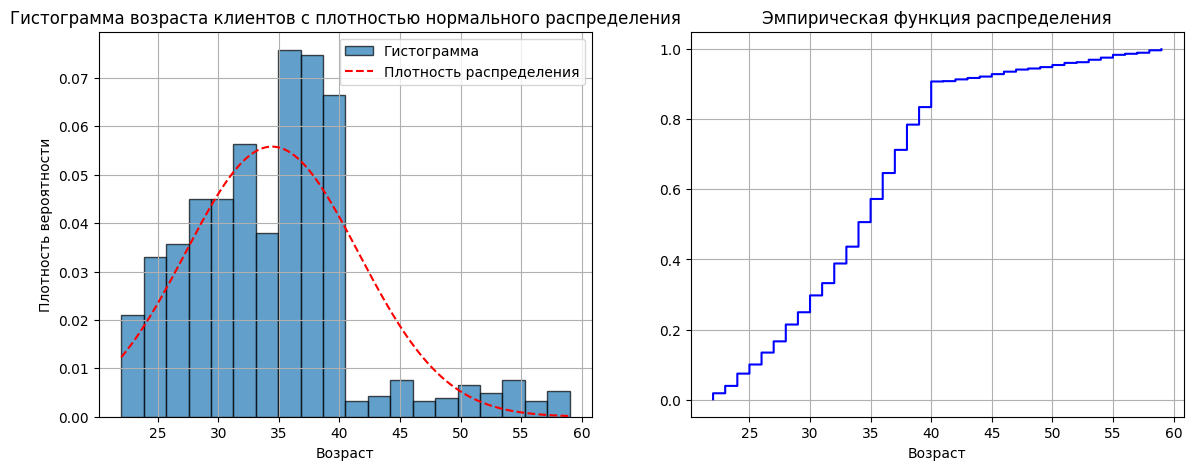

In [2]:
df = pd.read_excel('scoring.xlsx')
age = df['Возраст']

mean_age = age.mean()
std_age = age.std()
x = np.linspace(age.min(), age.max(), 1000)
pdf = norm.pdf(x, loc=mean_age, scale=std_age)

# Эмпирическая ф. распределения
sorted_age = np.sort(age)
n = len(sorted_age)
y = np.arange(1, n+1) / n


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма возраста, плотность распр.
ax1.hist(age, bins=20, density=True, edgecolor='black', alpha=0.7, label='Гистограмма')
ax1.plot(x, pdf, color='red', linestyle='--', label='Плотность распределения')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title('Гистограмма возраста клиентов с плотностью нормального распределения')
ax1.legend()
ax1.grid(True)

# Эмпирическая ф. распределения
ax2.step(sorted_age, y, where='post', color='blue', label='Эмпирическая функция распределения')
ax2.set_xlabel('Возраст')
ax2.set_title('Эмпирическая функция распределения')
ax2.grid(True)

plt.show()


## Проверка гипотезы о нормально распределении 

### Критерий Колмогорова

**Статистика**:
$$ D_n = \sup_{x} |F_n(x) - F(x)| $$ 

**Асимптотика**:

$$ \sqrt{n} D_n \xrightarrow{d} K $$




### Проверка нормальности распределений

при помощьи критерия Колмогорова-Смирнова

**t-тест** - 
$$ t = \frac{n_1 s_1^2 + n_2 s_2^2}{\sqrt{n_1 + n_2}} (\bar{x}_1 - \bar{x}_2) $$

**p-value** - это вероятность получить такие или более экстремальные результаты, как наблюдаемые, при условии верности нулевой гипотезы. 


 p-value вычисляется как вероятность того, что разница между средними значениями двух групп будет такой же большой или большей, чем наблюдаемая разница, при условии верности нулевой гипотезы.


### Нормальное распределение

**Параметры нормального распределения** (среднее 𝜇 и стандартное отклонение 𝜎) для каждой выборки:

$$ \mu = \frac{1}{n} \sum_{i=1}^{n} X_{1,i} $$


$$\sigma = \frac{1}{n - 1} \sum_{i=1}^{n} (X_{1,i} - \mu)^2$$


### Возраст:

In [3]:
X = df['Возраст']

mu = np.mean(X)
sigma = np.std(X, ddof=1)

# критерий колмогорова для проверки нормальности
kst_result = kstest(X, 'norm', args=(mu, sigma))

alpha = 0.05
print(f'Статистика Колмогорова-Смирнова: {kst_result.statistic}')
print(f'p-значение: {kst_result.pvalue}')

if kst_result.pvalue < alpha:
    print("Нулевая гипотеза отвергается: выборка не имеет нормальное распределение")
else:
    print("Нулевая гипотеза принимается: выборка имеет нормальное распределение")

Статистика Колмогорова-Смирнова: 0.1262027337754278
p-значение: 2.4990919542957674e-14
Нулевая гипотеза отвергается: выборка не имеет нормальное распределение


### Собственность

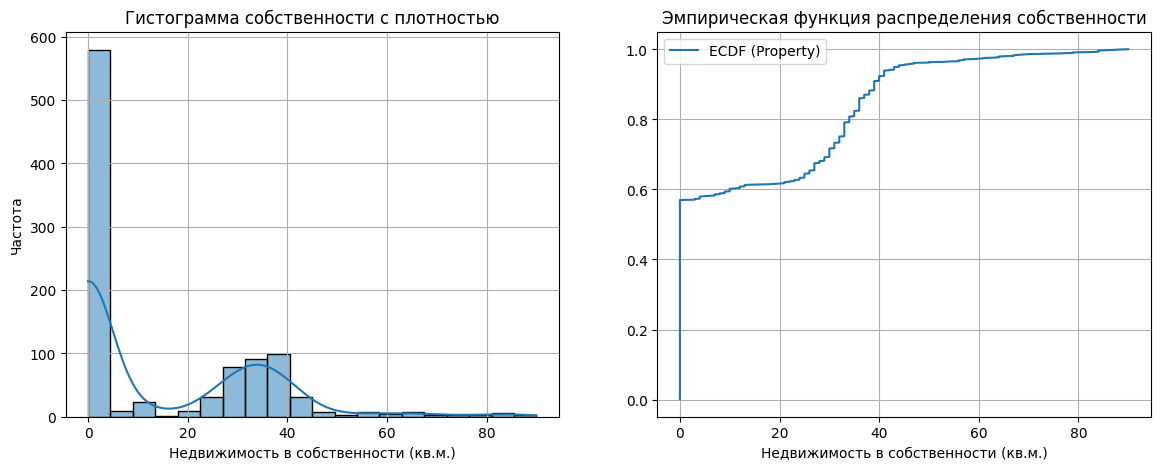

In [6]:
df = pd.read_excel('scoring.xlsx')
property  = df['Недвижимость в собственности (кв.м.)']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма с плотностью
sns.histplot(property, bins=20, kde=True, edgecolor='black', ax=ax1)
#sns.kdeplot(property, bw_adjust=0.5, label='PDF (Property)', fill=True, ax=ax1)
ax1.set_xlabel('Недвижимость в собственности (кв.м.)')
ax1.set_ylabel('Частота')
ax1.set_title('Гистограмма собственности с плотностью')
ax1.grid(True)

# Эмпирическая ф. распределения
ecdf_property = ECDF(property)
ax2.plot(ecdf_property.x, ecdf_property.y, label='ECDF (Property)')
ax2.set_xlabel('Недвижимость в собственности (кв.м.)')
ax2.set_title('Эмпирическая функция распределения собственности')
ax2.legend()
ax2.grid(True)

plt.show()

In [7]:
X = df['Недвижимость в собственности (кв.м.)']

mu = np.mean(X)
sigma = np.std(X, ddof=1)

# критерий колмогорова для проверки нормальности
kst_result = kstest(X, 'norm', args=(mu, sigma))

alpha = 0.05
print(f'Статистика Колмогорова-Смирнова: {kst_result.statistic}')
print(f'p-значение: {kst_result.pvalue}')

if kst_result.pvalue < alpha:
    print("Нулевая гипотеза отвергается: выборка не имеет нормальное распределение")
else:
    print("Нулевая гипотеза принимается: выборка имеет нормальное распределение")

Статистика Колмогорова-Смирнова: 0.344745845076293
p-значение: 1.5188431866360686e-106
Нулевая гипотеза отвергается: выборка не имеет нормальное распределение


## Гипотеза о равенстве мат ожиданий показателя Х

Признак X: Возраст


Признак У: Благонадежность заемщика (0 - неблагонадежный, 1 - благонадежный).



**Гипотеза о равенстве мат ожиданий показателя Х**


**H0**: Математическое ожидания показателя 𝑋 для двух групп равны.


Средний возраст для благонадежных и неблагонадежных заемщиков одинаков.

$$ H_0 : \mu_1 = \mu_2 $$


**H1**: Математическое ожидания показателя 𝑋 для двух групп не равны.


Средний возраст для благонадежных и неблагонадежных заемщиков разный.

$$ H_1 : \mu_1 \neq \mu_2 $$






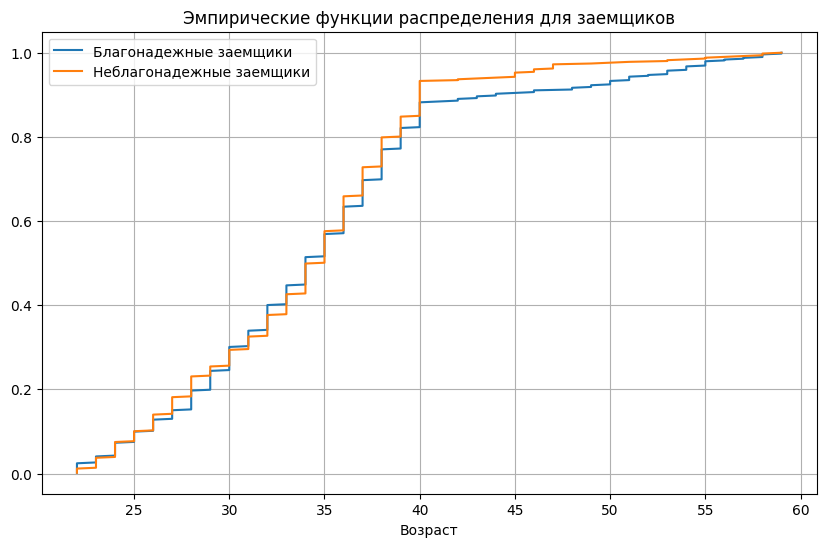

In [8]:
df = pd.read_excel('scoring.xlsx')

safe_borrower = df[df['Благонадежный заемщик'] == 1]['Возраст']
unsafe_borrower = df[df['Благонадежный заемщик'] == 0]['Возраст']

ecdf_safe = ECDF(safe_borrower)
ecdf_unsafe = ECDF(unsafe_borrower)

plt.figure(figsize=(10, 6))
plt.plot(ecdf_safe.x, ecdf_safe.y, label='Благонадежные заемщики')
plt.plot(ecdf_unsafe.x, ecdf_unsafe.y, label='Неблагонадежные заемщики')
plt.xlabel('Возраст')
plt.title('Эмпирические функции распределения для заемщиков')
plt.legend()
plt.grid(True)
plt.show()




## Проверка нормальности распределений значений в двух группах 



K-S test for safe borrowers (X1): KstestResult(statistic=0.1337937549503263, pvalue=3.8461873057272126e-08, statistic_location=40, statistic_sign=1)
K-S test for unsafe borrowers (X2): KstestResult(statistic=0.11373577875854524, pvalue=3.6090127422834248e-06, statistic_location=40, statistic_sign=1)


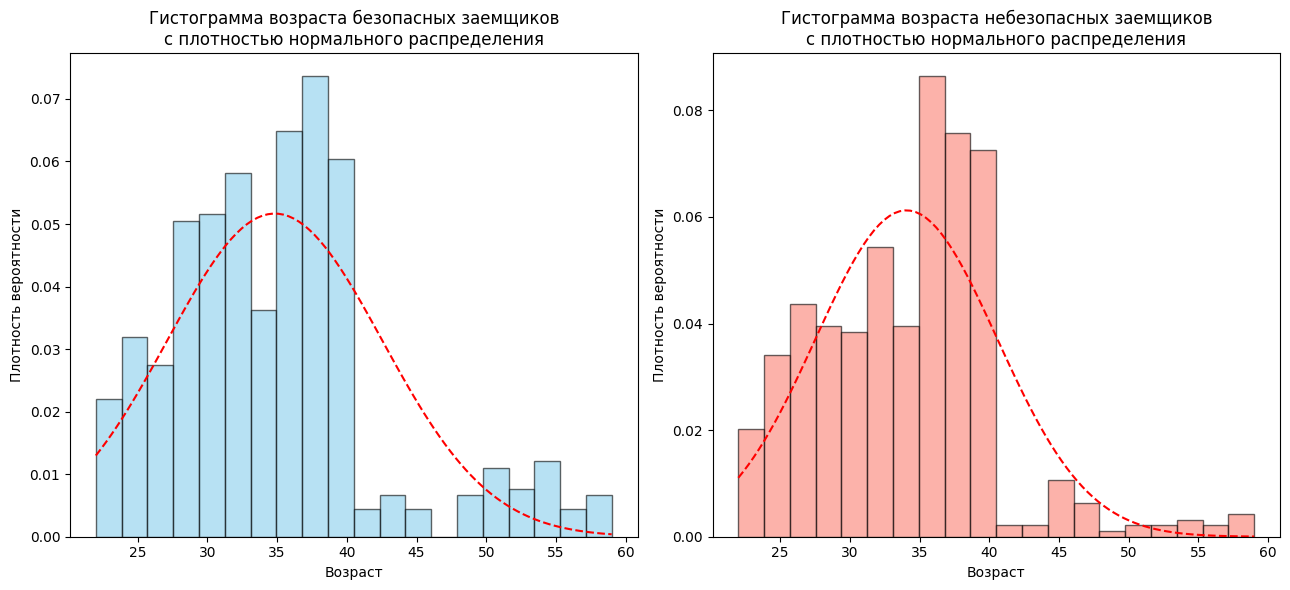

In [30]:
df = pd.read_excel('scoring.xlsx')

X1 = df[df['Благонадежный заемщик'] == 1]['Возраст']
X2 = df[df['Благонадежный заемщик'] == 0]['Возраст']

mean_X1 = np.mean(X1)
std_X1 = np.std(X1)
mean_X2 = np.mean(X2)
std_X2 = np.std(X2)

kstest_X1 = kstest(X1, 'norm', args=(mean_X1, std_X1))
kstest_X2 = kstest(X2, 'norm', args=(mean_X2, std_X2))

print("K-S test for safe borrowers (X1):", kstest_X1)
print("K-S test for unsafe borrowers (X2):", kstest_X2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

x = np.linspace(min(X1), max(X1), 100)
pdf_X1 = norm.pdf(x, mean_X1, std_X1)
ax1.hist(X1, bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')
ax1.plot(x, pdf_X1, 'r--')
ax1.set_title('Гистограмма возраста безопасных заемщиков\nс плотностью нормального распределения')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Плотность вероятности')


x = np.linspace(min(X2), max(X2), 100)
pdf_X2 = norm.pdf(x, mean_X2, std_X2)
ax2.hist(X2, bins=20, density=True, alpha=0.6, color='salmon', edgecolor='black')
ax2.plot(x, pdf_X2, 'r--')
ax2.set_title('Гистограмма возраста небезопасных заемщиков\nс плотностью нормального распределения')
ax2.set_xlabel('Возраст')
ax2.set_ylabel('Плотность вероятности')

plt.tight_layout()
plt.show()


t-статистика: -1.485838667902289
p-значение: 0.13747956347679738
Не отвергаем нулевую гипотезу о равенстве средних в двух группах.


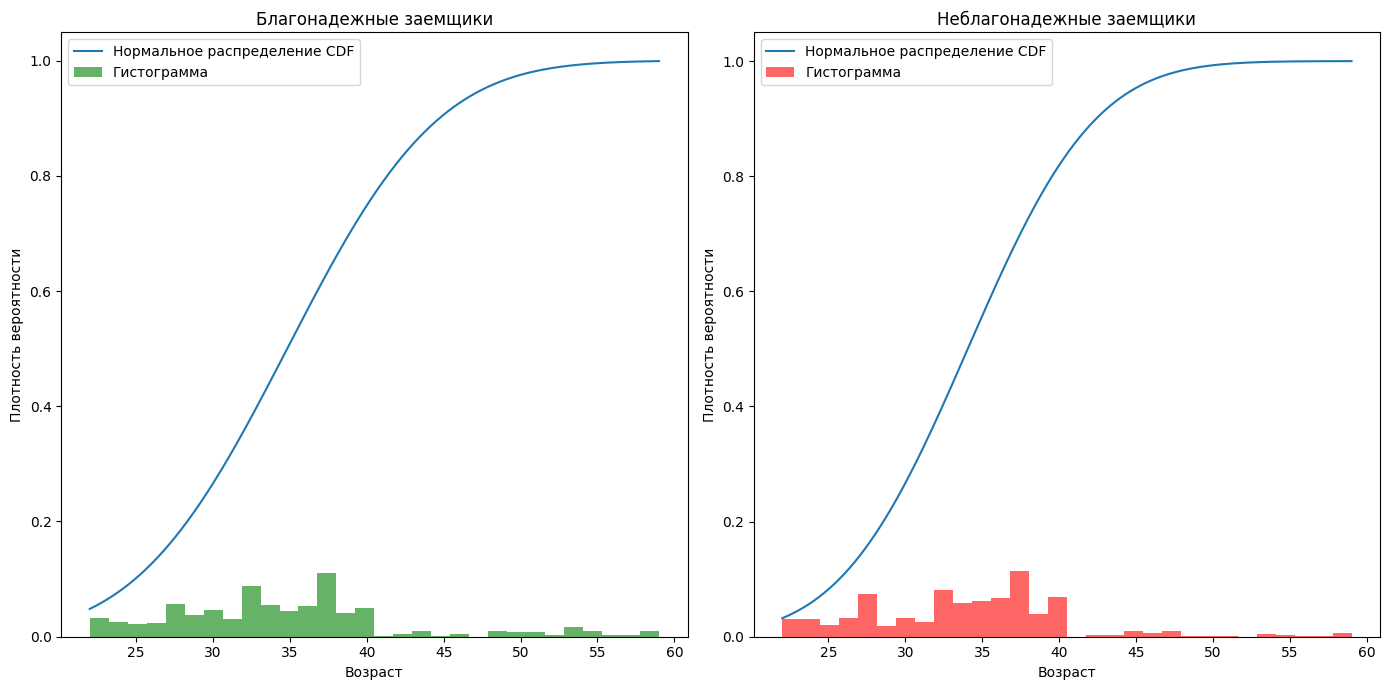

In [32]:
df = pd.read_excel('scoring.xlsx')

X1 = df[df['Благонадежный заемщик'] == 1]['Возраст']
X2 = df[df['Благонадежный заемщик'] == 0]['Возраст']

mean_X1 = np.mean(X1)
mu1 = np.mean(X1)
sigma1 = np.std(X1)
domain1 = np.linspace(np.min(X1), np.max(X1), 1000)
norm_dist_cdf1 = norm.cdf(domain1, loc=mu1, scale=sigma1)

# Параметры для второй выборки
mu2 = np.mean(X2)
sigma2 = np.std(X2)
domain2 = np.linspace(np.min(X2), np.max(X2), 1000)
norm_dist_cdf2 = norm.cdf(domain2, loc=mu2, scale=sigma2)


t_statistic, p_value = ttest_ind(norm_dist_cdf1, norm_dist_cdf2)

print("t-статистика:", t_statistic)
print("p-значение:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу о равенстве средних в двух группах.")
else:
    print("Не отвергаем нулевую гипотезу о равенстве средних в двух группах.")


# Визуализация
plt.figure(figsize=(14, 7))

# Визуализация для первой выборки
plt.subplot(1, 2, 1)
plt.plot(domain1, norm_dist_cdf1, label='Нормальное распределение CDF')
plt.hist(X1, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма')
plt.title('Благонадежные заемщики')
plt.xlabel('Возраст')
plt.ylabel('Плотность вероятности')
plt.legend()

# Визуализация для второй выборки
plt.subplot(1, 2, 2)
plt.plot(domain2, norm_dist_cdf2, label='Нормальное распределение CDF')
plt.hist(X2, bins=30, density=True, alpha=0.6, color='r', label='Гистограмма')
plt.title('Неблагонадежные заемщики')
plt.xlabel('Возраст')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.tight_layout()
plt.show()

## Проверка гипотезы об однородности групп по показателю Х

In [28]:
df = pd.read_excel('scoring.xlsx')

X1 = df[df['Благонадежный заемщик'] == 1]['Возраст']
X2 = df[df['Благонадежный заемщик'] == 0]['Возраст']

mean_X1 = np.mean(X1)
mu1 = np.mean(X1)
sigma1 = np.std(X1)
domain1 = np.linspace(np.min(X1), np.max(X1), 1000)
norm_dist_cdf1 = norm.cdf(domain1, loc=mu1, scale=sigma1)

# Параметры для второй выборки
mu2 = np.mean(X2)
sigma2 = np.std(X2)
domain2 = np.linspace(np.min(X2), np.max(X2), 1000)
norm_dist_cdf2 = norm.cdf(domain2, loc=mu2, scale=sigma2)